In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import *
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import *
from keras.applications import VGG16, ResNet50, InceptionV3 # pretrained models

In [4]:
import scipy

In [31]:
conv_base = VGG16(weights = "imagenet",
                 include_top = False,     # removing FC Layers
                 input_shape = (150,150,3)
                 )

In [32]:
vgg = Sequential()

vgg.add(conv_base)
vgg.add(Flatten())


vgg.add(Dense(512, kernel_initializer='he_normal', activation='relu'))
vgg.add(Dropout(0.2))
vgg.add(Dense(256, kernel_initializer='he_normal', activation='relu'))
vgg.add(Dropout(0.2))
vgg.add(Dense(128, kernel_initializer='he_normal', activation='relu'))
vgg.add(Dropout(0.2))
vgg.add(Dense(64, kernel_initializer='he_normal', activation='relu'))
vgg.add(Dropout(0.2))
vgg.add(Dense(1, kernel_initializer='glorot_uniform', activation='sigmoid'))


vgg.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_5 (Dense)             (None, 512)               4194816   
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 128)              

In [33]:
conv_base.trainable = False

In [ ]:
batch_size = 32  ## cause hamro ma 32 le crash gardinxa😂 

train_dg = ImageDataGenerator(rescale = 1./255,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip = True)
test_dg = ImageDataGenerator(rescale = 1./255)

train_gen = train_dg.flow_from_directory('./train',
                                         target_size=(150, 150),
                                         batch_size=batch_size,
                                         class_mode="binary")

test_gen = test_dg.flow_from_directory('./test',
                                       target_size=(150, 150),
                                       batch_size=batch_size,
                                       class_mode="binary")

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


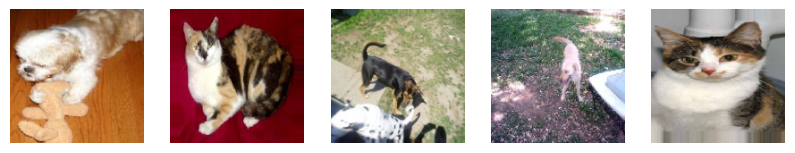

In [35]:
import matplotlib.pyplot as plt

images, labels = next(train_gen)

plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[i])
    plt.axis('off')
plt.show()

In [36]:
vgg.compile(optimizer= 'Adam', loss = "binary_crossentropy", metrics = ["accuracy"])

In [48]:
history2 = vgg.fit(train_gen,
                    epochs=21,
                    validation_data = test_gen)

Epoch 1/21
625/625 [==============================] - 93s 149ms/step - loss: 0.1873 - accuracy: 0.9230 - val_loss: 0.2044 - val_accuracy: 0.9064
Epoch 2/21
625/625 [==============================] - 99s 158ms/step - loss: 0.1788 - accuracy: 0.9274 - val_loss: 0.1905 - val_accuracy: 0.9200
Epoch 3/21
625/625 [==============================] - 117s 187ms/step - loss: 0.1766 - accuracy: 0.9264 - val_loss: 0.1909 - val_accuracy: 0.9212
Epoch 4/21
625/625 [==============================] - 105s 168ms/step - loss: 0.1796 - accuracy: 0.9275 - val_loss: 0.1953 - val_accuracy: 0.9214
Epoch 5/21
625/625 [==============================] - 111s 178ms/step - loss: 0.1665 - accuracy: 0.9336 - val_loss: 0.1957 - val_accuracy: 0.9192
Epoch 6/21
625/625 [==============================] - 91s 146ms/step - loss: 0.1642 - accuracy: 0.9349 - val_loss: 0.2017 - val_accuracy: 0.9124
Epoch 7/21
625/625 [==============================] - 118s 190ms/step - loss: 0.1681 - accuracy: 0.9317 - val_loss: 0.1879 - va

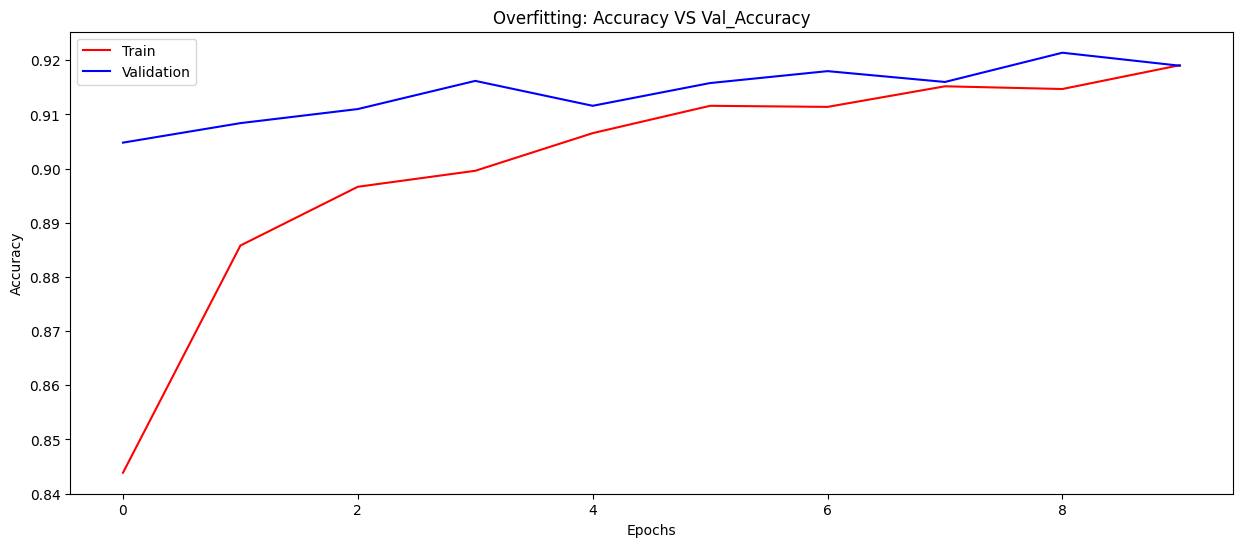

In [38]:
plt.figure(figsize=(15,6))
plt.plot(history2.history["accuracy"],color = "red",label = "Train")
plt.plot(history2.history["val_accuracy"],color = "blue", label = "Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Overfitting: Accuracy VS Val_Accuracy")
plt.legend()
plt.show()

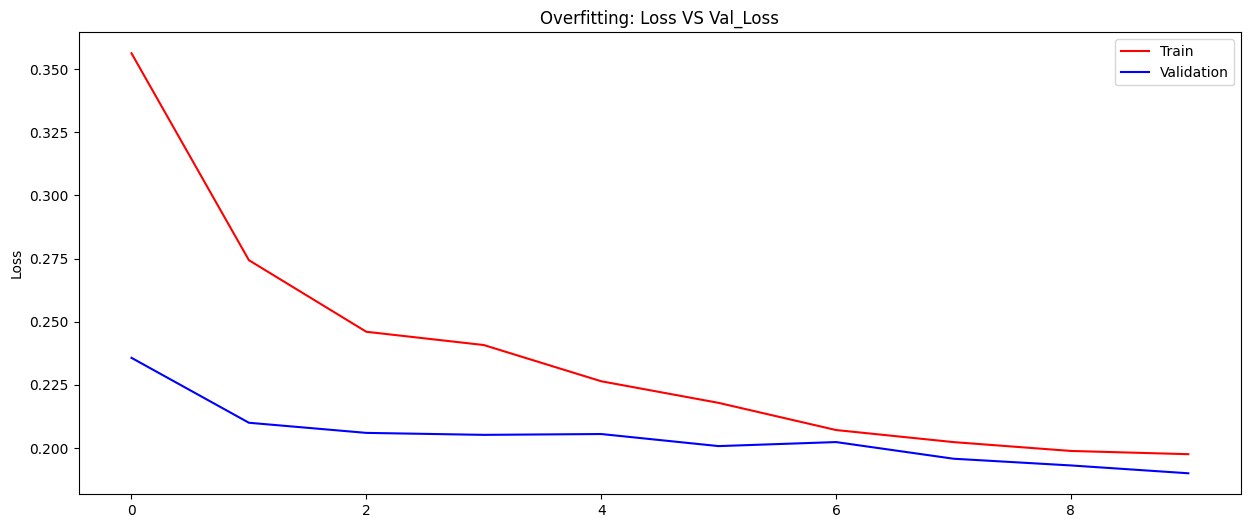

In [39]:
plt.figure(figsize=(15,6))
plt.plot(history2.history["loss"],color = "red",label = "Train")
plt.plot(history2.history["val_loss"],color = "blue", label = "Validation")
plt.ylabel("Loss")
plt.title("Overfitting: Loss VS Val_Loss")
plt.legend()
plt.show()

## prediciton for VGG16

In [7]:
def predict_vgg(test_img):
    test_img = cv2.resize(test_img, (150, 150))
    
    test_input = test_img.reshape((1, 150, 150, 3))
    
    predictions_vgg = vgg.predict(test_input)
    
    if predictions_vgg[0][0] > 0.5:
        print("Prediction: Dog")
    else:
        print("Prediction: Cat")

    plt.imshow(test_img)
    plt.show()

In [41]:
import cv2

1/1 [==============================] - 1s 815ms/step
Prediction: Cat


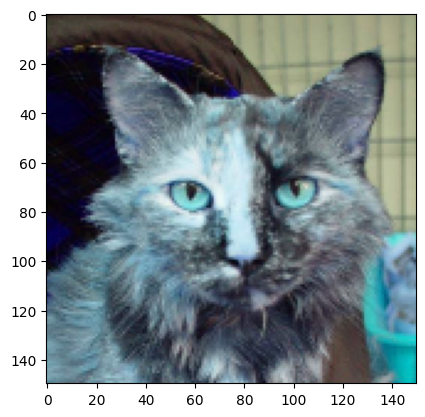

In [43]:
test_img = cv2.imread(r"C:\Users\samir\Desktop\cat-vs-dog\dogs_vs_cats\test\cats\cat.10.jpg") 
predict_vgg(test_img)

1/1 [==============================] - 0s 26ms/step
Prediction: Dog


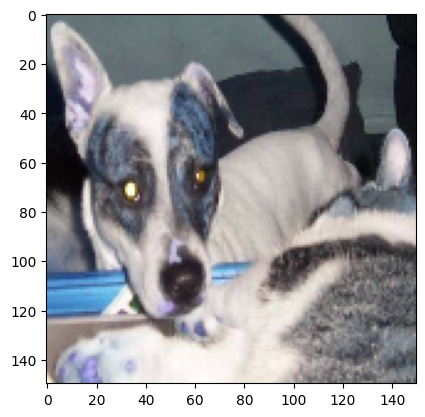

In [44]:
test_img = cv2.imread(r"C:\Users\samir\Desktop\cat-vs-dog\dogs_vs_cats\test\dogs\dog.12390.jpg")
predict_vgg(test_img)

1/1 [==============================] - 0s 15ms/step
Prediction: Dog


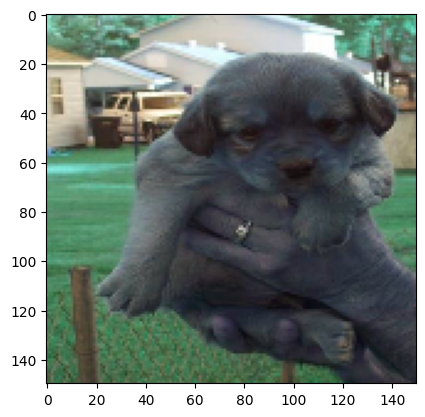

In [45]:
test_img = cv2.imread(r"C:\Users\samir\Desktop\cat-vs-dog\dogs_vs_cats\test\dogs\dog.75.jpg")
predict_vgg(test_img)

In [ ]:
import pickle
from keras.models import load_model

with open('trained_model.pickle', 'wb') as f:
    pickle.dump(vgg, f)
vgg.save('trained_model_2.h5') 




INFO:tensorflow:Assets written to: ram://c0e2a9da-8b61-4b33-ad09-d4c2dd16452f/assets


INFO:tensorflow:Assets written to: ram://c0e2a9da-8b61-4b33-ad09-d4c2dd16452f/assets


### Basically first i trained the model for 10 epochs gaining 90% val accuracy, but felt like i can try more so that to avoid retraining, i loaded the model in the form of trained_model.h5 and reused it later for next 21 epochs, making overall 30 + 1 for goodluck. 
- Final conclusion: couldn't improve on val accuracy, so i'll be using previous model upto 10 epochs for the deployment (thought ki this is less complex)